## Task1




## Part A
ML problems can be classified as supervised learning, unsupervised learning and reinforcement learning problems. Supervised learning problems depict classification and regression problems in machine learning. In supervised learning a labeled dataset is required so that the machine can be trained to know when it is right or wrong. Unsupervised learning problems depict dimensionality reduction and clustering. In unsupervised learning as the name suggests there is no supervision that is no labeled dataset is required. Just a huge dataset without any instruction is given to the machine and then either clustering or dimensionality reduction techniques are applied on the data. The dataset provided does not have a specific desired outcome. In both supervised and unsupervised learning neural network models are used. Reinforcement Learning is learning via reward wherein when a machine chooses the correct step then it is rewarded and when incorrect it is punished. Supervised learning predicts a class and is trained on class, reinforcement learning is trained on the reward signal and predicts an action. Although the inputs are similar, the label and training are very different. Rule-based learning is simple and uses IF-THEN statements to guide the system to reach a conclusion. It has to main components a set of facts and a set of rules. Unlike rules-based methods, machine learning is probabilistic and uses statistical models rather than deterministic rules. ML models need to be trained whereas in the case of rule-based model no training is required.

## Part B
The CIFAR-10 small photo classification problem is a standard dataset used in computer vision and deep learning. The dataset is comprised of 60,000 images with a size of 32×32 pixel of objects from 10 classes, such as frogs, birds, cats, ships, etc. We can see that there are 50,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 32×32 pixels and color, with three channels. A test harness is created to evaluate the model. This test harness has five key elements such as loading of the dataset, preparation of the dataset, definition of the model, evaluation of the model and presentation of results. For choosing a base line model, three models with different number of VGG blocks were created and their performance plotted to find a good starting point. The results from those all had a dramatic pattern of overfitting although the accuracy did improve with increasing the number of VGG blocks. Then to improve performance, regularization techniques such as dropout regularization, weight decay, data augmentation techniques were used. The results from these were that dropout and data augmentation were better. So both were used together and result was that learning had been slowed without overfitting, allowing continued improvement. Further improvement would involve batch normalization as well which improved the accuracy further. At the end the prediction of the model was tested for an image from CIFAR-10 test dataset and the model predicted correctly.



The example below loads the CIFAR-10 dataset using the Keras API and creates a plot of the first nine images in the training dataset.

Using TensorFlow backend.


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


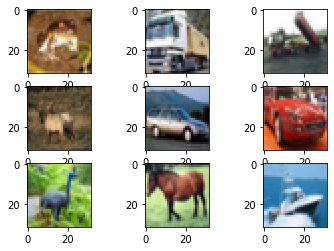

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


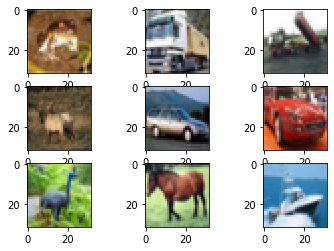

In [8]:

# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [9]:
import sys
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

In [10]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 

In [11]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()
 

## PART C
## A

In [12]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(128, (5, 5),kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	
	model.add(Conv2D(64, (3, 3),kernel_initializer='he_uniform', padding='same'))
	
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.0001, momentum=0)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
    

In [13]:
# define cnn model
def define_model1():
	model = Sequential()
	model.add(Conv2D(128, (5, 5),kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	
	model.add(Conv2D(64, (3, 3),kernel_initializer='he_uniform', padding='same'))
	
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
    

In [14]:
# define cnn model
def define_model2():
	model = Sequential()
	model.add(Conv2D(128, (5, 5),kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	
	model.add(Conv2D(64, (3, 3),kernel_initializer='he_uniform', padding='same'))
	
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
    

> 51.280


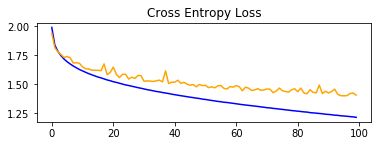

In [15]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Model with lr=0.0001 and momentum =0 batch size =64

> 48.610


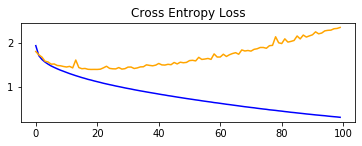

In [16]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model1()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Model with lr=0.001 and momentum =0 batch size =64

> 10.000


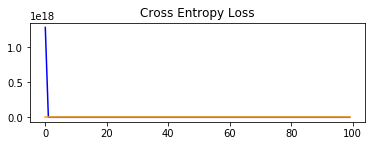

In [17]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model2()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Model with lr=0.01 and momentum =0 batch size =64

## B

In [18]:
# define cnn model
def define_model3():
	model = Sequential()
	model.add(Conv2D(128, (5, 5),kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	
	model.add(Conv2D(64, (3, 3),kernel_initializer='he_uniform', padding='same'))
	
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
    

In [19]:
# define cnn model
def define_model4():
	model = Sequential()
	model.add(Conv2D(128, (5, 5),kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	
	model.add(Conv2D(64, (3, 3),kernel_initializer='he_uniform', padding='same'))
	
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
    

In [20]:
# define cnn model
def define_model5():
	model = Sequential()
	model.add(Conv2D(128, (5, 5),kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	
	model.add(Conv2D(64, (3, 3),kernel_initializer='he_uniform', padding='same'))
	
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
    

> 48.940


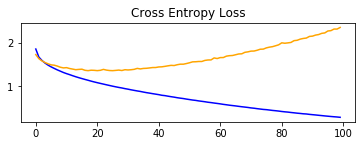

In [21]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model3()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Model with lr=0.0001 and momentum =0.9 batch size =64

> 45.760


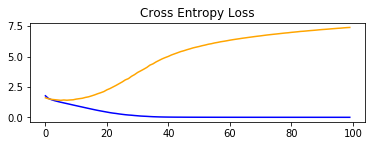

In [22]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model4()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Model with lr=0.001 and momentum =0.9 batch size =64

> 10.000


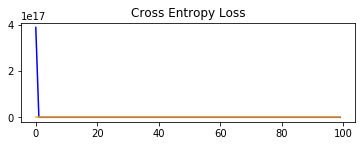

In [32]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model5()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Model with lr=0.01 and momentum =0.9 batch size =64

## C

In [24]:
# define cnn model
def define_model7():
	model = Sequential()
	model.add(Conv2D(128, (5, 5),kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	
	model.add(Conv2D(64, (3, 3),kernel_initializer='he_uniform', padding='same'))
	
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
    

> 45.720


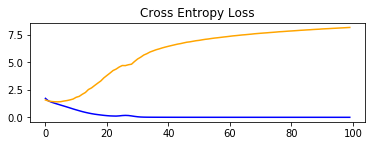

In [25]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model7()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Model with lr=0.001 and momentum =0.9 batch size =32

> 46.480


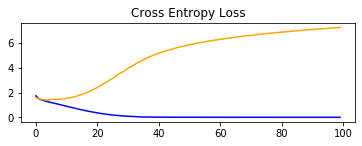

In [26]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model7()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Model with lr=0.001 and momentum =0.9 batch size =64

> 46.780


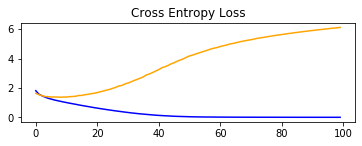

In [27]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model7()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=128, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Model with lr=0.001 and momentum =0.9 batch size =128

## D

In [28]:
# define cnn model
def define_model6():
	model = Sequential()
	model.add(Conv2D(128, (5, 5),kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	
	model.add(Conv2D(64, (3, 3),kernel_initializer='he_uniform', padding='same'))
	
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
	return model
 
    

> 51.780


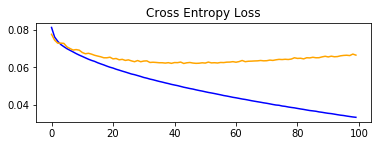

In [29]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model6()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Model with lr=0.001 and momentum =0.9 batch size =64 l2 Loss

## TASK 2

## Part A

The class of machine learning algorithms concerned with maximizing some form of reward for an agent in an environment by learning how to best select among a set of actions is called reinforcement learning. Table based reinforcement learning is for problems in which state and action spaces are small enough for approximate values functions to be represented as arrays and tables. In Table based reinforcement learning, we have two choices when it’s the user turn either to explore or exploit. Exploit means that the user would chooses the best solution according to the table this would not promote learning whereas if user explores then a random solution is chosen and the agent will learn more. A Markov Decision Process (MDP) is a Markov chain extended with decision nodes and rewards. A solution to an MDP is then a policy that maximizes reward over time. An MDP describes the interaction between an agent and an environment. The agent does not have the full picture of its environment and the more it interacts the more it learns and the more reward it can collect. A policy defines an interaction sequence and if that sequence is finite, then the sum converges. If it is infinite, then the sum may diverge. Q-learning is a model-free reinforcement learning algorithm to learn a policy telling an agent what action to take under what circumstances. For any finite Markov decision process, Q-learning finds an optimal policy that maximizes the expected value of the total reward over all successive steps, starting from the current state.

## Part B

Any policy defines an interaction sequence:
s0,a0,r1,s1,a1,r2,s2,a2,r3....
where s0,s1,s2 are states , a0,a1,a2 area actions and r1,r2 are rewards 

Acuumalated reward from time t would be:
rt + rt+1 + rt+2 + .....

Reward now is better than reward later in many cases...
We can include that aspect into our model by using a discount
factor gamma in the range of [0,1] and define the accumulated discounted reward of
the above sequence as:
Rt = rt + gamma· rt+1 + (gamma)^2 · rt+2 +. . .

Rt = rt+ gamma· rt+1 + (gamma)^2 · rt+2 +. . .
Rt = rt+ gamma·[rt+1 + gamma· rt+2 + (gamma)^2 · rt+3 ]
Rt = rt+ gamma·Rt+1.

Q(s,a), where Q stands for “quality” and for each action a and state s. 
Q(s,a) is used for approximating the maximum accumulated discounted reward when we perform the action a in state s, and continue optimally from there.

Therefore are policy will be:
Policy(s)= argmax Q(s,a)

{new value}Q(s,a) = {old value}Q(s,a) + lr[rt+1 + gamma . argmax Q(st+1,a) - Q(s,a){old value}]
{new value}Q(s,a) = Q(s,a)[1- lr] + lr[rt+1 + gamma . argmax Q(st+1,a)]
where lr is laerning rate, gamma is the discount factor and rt+1 is the rewards for action a t ochange state from st to s+1.

## Part C

In [31]:


def planet(a,old_state):
    x,y=old_state['x'],old_state['y']
    p=0
    if [x,y] in ([2,2],[6,6]):
        p+=100
        return old_state,p
    if [x,y] in [4,4]:
        return old_state,p
    actionChange = {
      'up': [0,1],
      'down': [0,-1],
      'left': [-1,0],
      'right': [1,0]
    }
    change = actionChange[action]
    p+=1
    x += change[0]
    y += change[1]
    x %= 10
    y %= 10
    return {'x':x, 'y':y},p

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 21)

## Part D

In [ ]:
def Q-Learning():
    min_Q = -9999.99
    for action in ['up','down','left','right']:
        next_next_s,penalty = planet(action, curr_s) 
        min_Q = max(min_Q, penalty)
        Q[curr_s][next_s] = ((1 - lrn_rate) * Q[curr_s][next_s]) + (lrn_rate * (penalty + (gamma * min_Q)))
        curr_s = next_s
        x,y = next_s['x'],next_s['y']
        if [x,y] in [[2,2],[4,4],[6,6]]: break ResetGame()
        
    Policy= np.argmax(val)    
        #Policy  and Q-update remain the same as we are returning penalty which is negative reward and we maximize it which works.
        #gamma = 0.9
        #lrn_rate = 0.2

def planet(a,old_state):
    x,y=old_state['x'],old_state['y']
    if [x,y] in terminals:
    	return old_state,0
  
    actionChange = {
      'up': [0,1],
      'down': [0,-1],
      'left': [-1,0],
      'right': [1,0]
    }

    change = actionChange[a]
    x += change[0]
    y += change[1]
    x %= 10
    y %= 10
    if [x,y] in ([2,2],[6,6]):
        return {'x':x,'y':y},-100
    if [x,y] == [4,4]:
        return {'x':x,'y':y},0
    return {'x':x, 'y':y}, -1
    

## TASK 3
Mining Big Data offers new ways to optimize processes, identify interdependencies and make informed decisions. Big Data creates new business opportunities, not only due to its application in marketing, but as information itself is becoming monetized. The potential of Big Data spans every area of social activity, from the processing of human language and the management of financial assets, to the harnessing of information enabling large cities to manage the balance between energy consumption and production. In the area of medicine, Big Data could make it possible to tailor medications to patients, thereby increasing their effectiveness and reducing their side effects. Big Data could also accelerate the research and development of new drugs and focus resources on the areas of greatest need. One of the greatest successes of Big Data is automatic speech recognition and processing examples like Siri, Google Maps and Google translate. Big Data play an important role in the financial sector. Financial transactions are scanned by Big Data algorithms for abnormalities to detect suspicious activities. Deep learning algorithms are celebrating great successes in everyday applications that do not require an understanding of a hidden logic or causal interdependencies. These algorithms are universal learning procedures which, theoretically, could learn any pattern or input-output relation, given enough time and data. Such algorithms are particularly strong in pattern recognition tasks, i.e. reading, listening, watching, and classifying contents. Problems with Big Data and persuasive technologies are regarding security and privacy as cybercrime including identity theft and financial theft are increasing daily. Mining user data is like violating a user’s privacy and countries might opt for mass surveillance as the default method for countering terrorism rather than using standard investigation methods. Persuasive technologies could use user data against the users by trying to program the user based on the choices of the user provided by the data. Users can be nudged and manipulated due to access of this data. Problems with AI and SI would be as these systems may be able to comprehend a lot of data but in many cases the meaning of the data lies in the context which is mostly not understood by these systems. To use such systems to shape society might backfire as they might go against the interests of the society. Recommendation to prevent miss use would be that the security should be highly valued regarding big data and for AI the users of automated technologies should be accountable for appropriate efforts to control and use them properly.  Contingency plans should be available for the case where an automated system gets out of control. The application of automation should affect sufficiently small parts of the entire system only, which calls for decentralized, distributed, modular approaches and engineered breaking points to avoid cascade effects. For Persuasive technologies manipulation attempts should be easily recognizable, e.g. by requiring everyone to mark the kind of information (advertisement, opinion, or fact) and for collective intelligence to work, having a knowledge base of trustable and unbiased facts is key, such that measures against information pollution are advised 